### Project Description:
This notebook project is a comprehensive analysis of a fictional retail dataset. It involves several key data analysis tasks aimed at deriving actionable business insights. The project covers:

- Data Collection and Generation: Creating a fictional dataset that simulates retail sales transactions, including details such as product categories, prices, quantities, and store locations.
- Data Analysis: Performing various analytical tasks such as price elasticity, A/B testing, and basket composition analysis to understand customer behavior and market trends.
- Business Insights: Synthesizing the results of the analysis to provide strategic recommendations that can guide business decisions.

### First, we import the necessary libraries

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

### Now, we create a sales dataset

In [48]:
# Setting the random seed to ensure the randomly generated values are all the same
random.seed(42)

n_transactions = 5001
products = ['Flower', 'Edibles', 'Vape', 'Tinctures', 'Topicals', 'Pre-Rolls', 'Jar', 'Live Resin']
store_ids = [99, 100, 101, 102, 103, 104, 105]
product_ids = range(99, 169)
dates = pd.date_range(start='2024-01-01', periods=365).tolist()

sales_data = {
    'transaction_id': np.arange(n_transactions),
    'date': [random.choice(dates) for _ in range(n_transactions)],
    'product_id': [random.choice(product_ids) for _ in range(n_transactions)],
    'category': [random.choice(products) for _ in range(n_transactions)],
    'price': np.round(np.random.uniform(10, 100, n_transactions), 2),
    'quantity': [random.randint(1, 10) for _ in range(n_transactions)],  # Increased range for quantity
    'store_ids': [random.choice(store_ids) for _ in range(n_transactions)]
}

sales_df = pd.DataFrame(sales_data)

# Calculate the total amount
sales_df['total_amount'] = sales_df['price'] * sales_df['quantity'].round(2)


### Next, we create a dataset for patient buying patterns

In [49]:
n_patients = 1000
patient_ids = range(1,1000)

buying_patterns_data = {
    'patient_id': [random.choice(patient_ids) for _ in range(n_transactions)],
    'transaction_id': np.arange(n_transactions),
    'product_list': [[random.choice(products) for _ in range(random.randint(1,4))] for _ in range(n_transactions)]
}

buying_patterns_df = pd.DataFrame(buying_patterns_data)

### Then, we create another dataset for competitor pricing

In [50]:
competitors = ['Seed Junky', 'Curaleaf', 'Veraheal', 'Sunny Side Shop', 'Backpack Boyz', 'Stiizy', 'Jungle Boys', 'Kiva']

competitor_pricing_data = {
    'competitor': [random.choice(competitors) for _ in range(100)],
    'product_id': [random.choice(product_ids) for _ in range(100)],
    'price': np.round(np.random.uniform(10, 100, 100), 2),
    'date': [random.choice(dates) for _ in range(100)]
}


competitor_pricing_df = pd.DataFrame(competitor_pricing_data)

### Next, we create the A/B testing dataset

In [51]:
# List for A/B testing purposes
test_group = ['A', 'B']

ab_test_data = {
    'test_group': [random.choice(test_group) for _ in range(200)],
    'product_id': [random.choice(product_ids) for _ in range(200)],
    'price': np.round(np.random.uniform(10, 100, 200), 2),
    'sales': np.random.randint(1, 50, 200)
}

ab_test_df = pd.DataFrame(ab_test_data)

### Finally, we need to save the datasets to a CSV file.

In [52]:
sales_df.to_csv('sales_data.csv', index=False, float_format='%.2f')
buying_patterns_df.to_csv('buying_patterns.csv', index=False)
competitor_pricing_df.to_csv('competitor_pricing.csv', index=False)
ab_test_df.to_csv('ab_testing.csv', index=False)

### Exploratory Data Analysis below:

In [53]:
sales_df = pd.read_csv('sales_data.csv')
buying_patterns_data = pd.read_csv('buying_patterns.csv')
competitor_pricing_df = pd.read_csv('competitor_pricing.csv')
ab_test_df = pd.read_csv('ab_testing.csv')

In [54]:
# Inspecting the sales dataset
print("Sales Data Info:")
print(sales_df.info())
print(sales_df.describe())
print(sales_df.head())

Sales Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  5001 non-null   int64  
 1   date            5001 non-null   object 
 2   product_id      5001 non-null   int64  
 3   category        5001 non-null   object 
 4   price           5001 non-null   float64
 5   quantity        5001 non-null   int64  
 6   store_ids       5001 non-null   int64  
 7   total_amount    5001 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 312.7+ KB
None
       transaction_id   product_id        price     quantity    store_ids  \
count     5001.000000  5001.000000  5001.000000  5001.000000  5001.000000   
mean      2500.000000   133.708258    54.910360     5.479904   101.958208   
std       1443.808678    20.261270    26.116807     2.916238     2.017239   
min          0.000000    99.000000    10.000000   

In [55]:
# Inspecting the buying patterns dataset
print("\nBuying Patterns Data Info:")
print(buying_patterns_df.info())
print(buying_patterns_df.describe())
print(buying_patterns_df.head())


Buying Patterns Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   patient_id      5001 non-null   int64 
 1   transaction_id  5001 non-null   int64 
 2   product_list    5001 non-null   object
dtypes: int64(2), object(1)
memory usage: 117.3+ KB
None
        patient_id  transaction_id
count  5001.000000     5001.000000
mean    495.392122     2500.000000
std     288.021062     1443.808678
min       1.000000        0.000000
25%     248.000000     1250.000000
50%     490.000000     2500.000000
75%     747.000000     3750.000000
max     999.000000     5000.000000
   patient_id  transaction_id                            product_list
0          63               0            [Tinctures, Jar, Live Resin]
1         847               1                     [Topicals, Edibles]
2         513               2             [Live Resin, Edibles, 

In [56]:
# Inspecting the competitor pricing dataset
print("\nCompetitor Pring Data Info:")
print(competitor_pricing_df.info())
print(competitor_pricing_df.describe())
print(competitor_pricing_df.head())


Competitor Pring Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   competitor  100 non-null    object 
 1   product_id  100 non-null    int64  
 2   price       100 non-null    float64
 3   date        100 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.3+ KB
None
       product_id       price
count   100.00000  100.000000
mean    132.47000   53.604800
std      20.64733   25.321343
min     101.00000   10.000000
25%     112.00000   31.092500
50%     134.00000   54.465000
75%     151.25000   74.225000
max     168.00000   99.720000
      competitor  product_id  price        date
0  Backpack Boyz         140  70.78  2024-01-02
1       Curaleaf         131  90.30  2024-07-28
2     Seed Junky         161  85.00  2024-08-28
3         Stiizy         141  84.00  2024-01-26
4     Seed Junky         144  82.42  2024-10-

In [57]:
# Inspecting the A/B Testing dataset
print("\nA/B Test Data Info:")
print(ab_test_df.info())
print(ab_test_df.describe())
print(ab_test_df.head())


A/B Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   test_group  200 non-null    object 
 1   product_id  200 non-null    int64  
 2   price       200 non-null    float64
 3   sales       200 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 6.4+ KB
None
       product_id       price       sales
count  200.000000  200.000000  200.000000
mean   129.760000   54.565750   25.310000
std     20.606688   26.269907   13.672181
min     99.000000   10.350000    1.000000
25%    111.000000   32.597500   14.000000
50%    127.000000   51.945000   26.000000
75%    148.000000   78.832500   35.250000
max    168.000000   99.680000   49.000000
  test_group  product_id  price  sales
0          B         102  76.85     17
1          B         166  98.30     26
2          A         107  46.51     16
3          A         110  49

### Let's handle outliers. We'll visualize the distributions of prices, quantities, and sales to detect outliers.

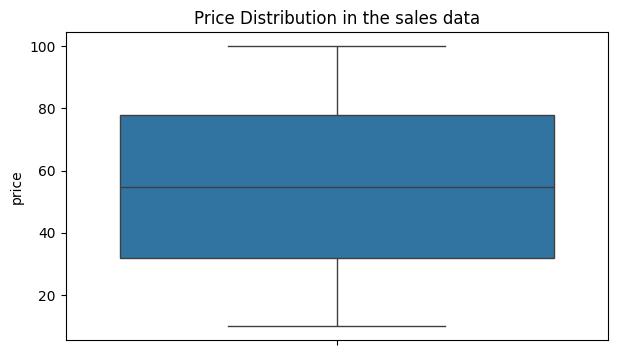

In [58]:
# Plotting the distribution of prices in the sales data
plt.figure(figsize=(7, 4))
sns.boxplot(sales_df['price'])
plt.title("Price Distribution in the sales data")
plt.show()

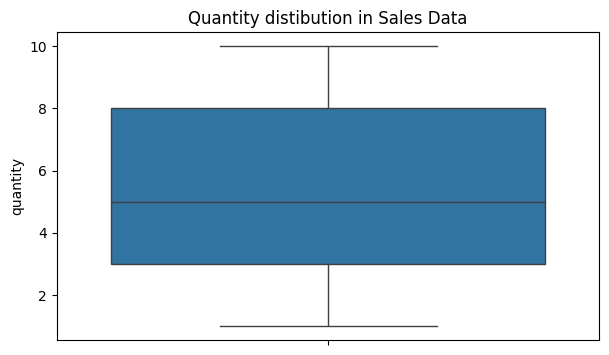

In [59]:
# Plotting the distribution of quantities in sales data
plt.figure(figsize=(7, 4))
sns.boxplot(sales_df['quantity'])
plt.title("Quantity distibution in Sales Data")
plt.show()

In [60]:
price_cap = sales_df['price'].quantile(0.99)
sales_df['price'] = sales_df['price'].clip(upper=price_cap)

### Basic Visualizations and Data Distribution

#### Next, we'll create some visualizations to get a feel for the distrubtion and relationships in the data:
##### Sales by category : See which product categories perform best
##### Sales by store: Understand which store locations are selling the most

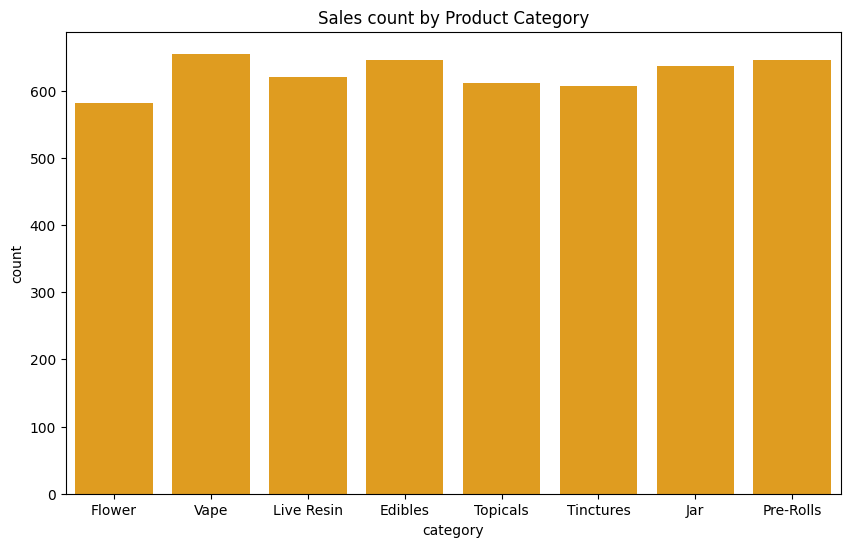

In [78]:
# Sales by Category
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=sales_df, color='orange')
plt.title("Sales count by Product Category")
plt.show()

### Sales Count by Product Category
This bar chart shows the sales count for eight product categories: Flower, Vape, Live Resin, Edibles, Topicals, Tinctures, Jar, and Pre-Rolls. Each bar represents the number of sales for a specific category.

Key Points:

- Sales Comparison: All categories have similar sales counts, indicating balanced sales across different products.
- Visual Insight: The chart provides a clear comparison of sales, helping to identify any outliers or trends.

This visualization helps in understanding the sales distribution among different product categories.
______

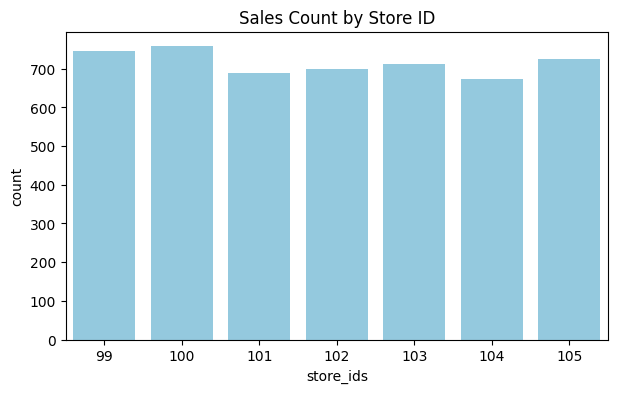

In [65]:
# Sales by Store
plt.figure(figsize=(7, 4))
sns.countplot(x='store_ids', data=sales_df, color='skyblue')
plt.title('Sales Count by Store ID')
plt.show()

### Sales Count by Store ID
This bar chart shows the sales count for six stores (Store IDs 99 to 105). Each bar represents the number of sales for a specific store.

Key Points:

- Sales Comparison: All stores have similar sales counts, indicating consistent performance across locations.
- Visual Insight: The chart provides a clear comparison of sales, helping to identify any outliers or trends.

This visualization helps in understanding the sales distribution among different stores.
_______

### Which Product Categories are Driving the most revenue?

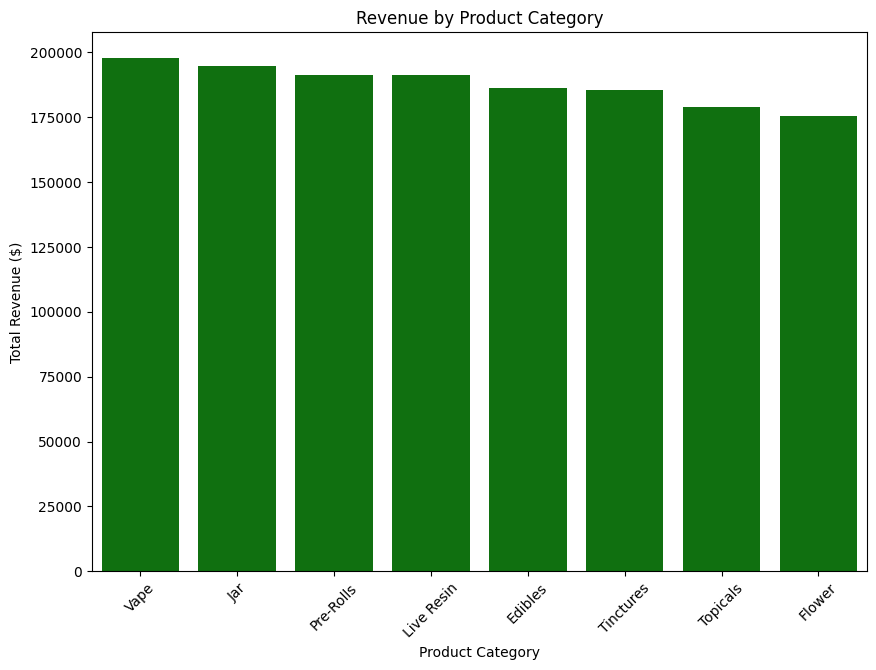

In [64]:
# Total revenue by product category
revenue_by_category = sales_df.groupby('category')['total_amount'].sum().reset_index()

# Sort by total revenue
revenue_by_category = revenue_by_category.sort_values(by='total_amount', ascending=False)

# Plot the revenue by category
plt.figure(figsize=(10, 7))
sns.barplot(x='category', y='total_amount', data=revenue_by_category, color='green')
plt.title('Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.show()

### Revenue by Product Category
This bar chart shows the total revenue for eight product categories: Vape, Jar, Pre-Rolls, Edibles, Tinctures, Flower, Live Resin, and Topicals. Each bar represents the revenue in dollars for a specific category.

Key Points:

- Revenue Comparison: All categories have similar revenue figures, indicating balanced sales across different products.
- Visual Insight: The chart provides a clear comparison of revenue, helping to identify any outliers or trends.

This visualization helps in understanding the revenue distribution among different product categories.
_______________________________

### Which stores perform best in terms of Sales and Revenue

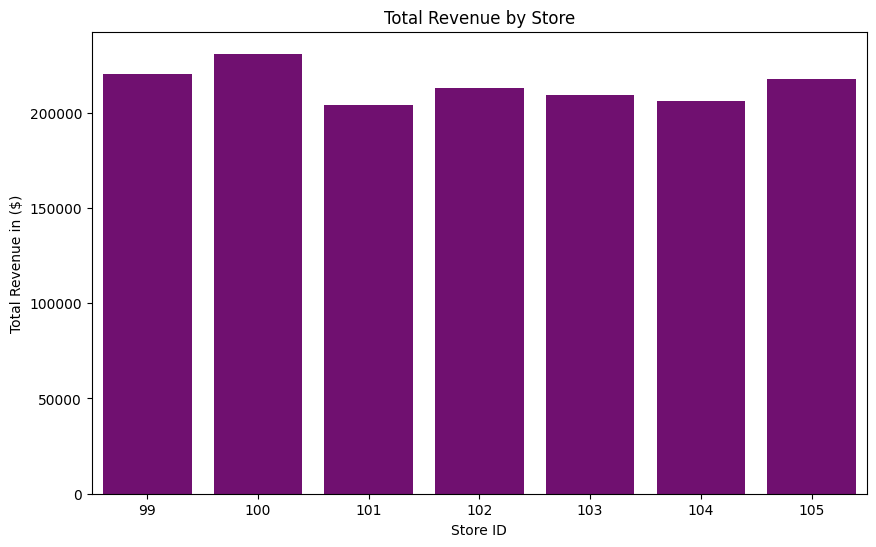

In [69]:
# Total sales and revenue by store
store_performance = sales_df.groupby('store_ids').agg({
    'transaction_id': 'count',
    'total_amount': 'sum'
}).reset_index()

store_performance.columns = ['store_id', 'total_sales', 'total_revenue']

# Plot revenue by store
plt.figure(figsize=(10, 6))
sns.barplot(x='store_id', y='total_revenue', data=store_performance, color='purple')
plt.title("Total Revenue by Store")
plt.xlabel("Store ID")
plt.ylabel("Total Revenue in ($)")
plt.show()

### Total Revenue by Store
This bar chart shows the total revenue for seven stores (Store IDs 99 to 105). Each bar represents a store’s revenue in dollars.

Key Points:

- Revenue Comparison: All stores have similar revenue figures, indicating consistent performance across locations.
- Visual Insight: The chart provides a clear comparison of revenue, helping to identify any outliers or trends.
- This visualization helps in understanding the revenue distribution among different stores.

_______________________________

### Are there seasonal trends in Sales?

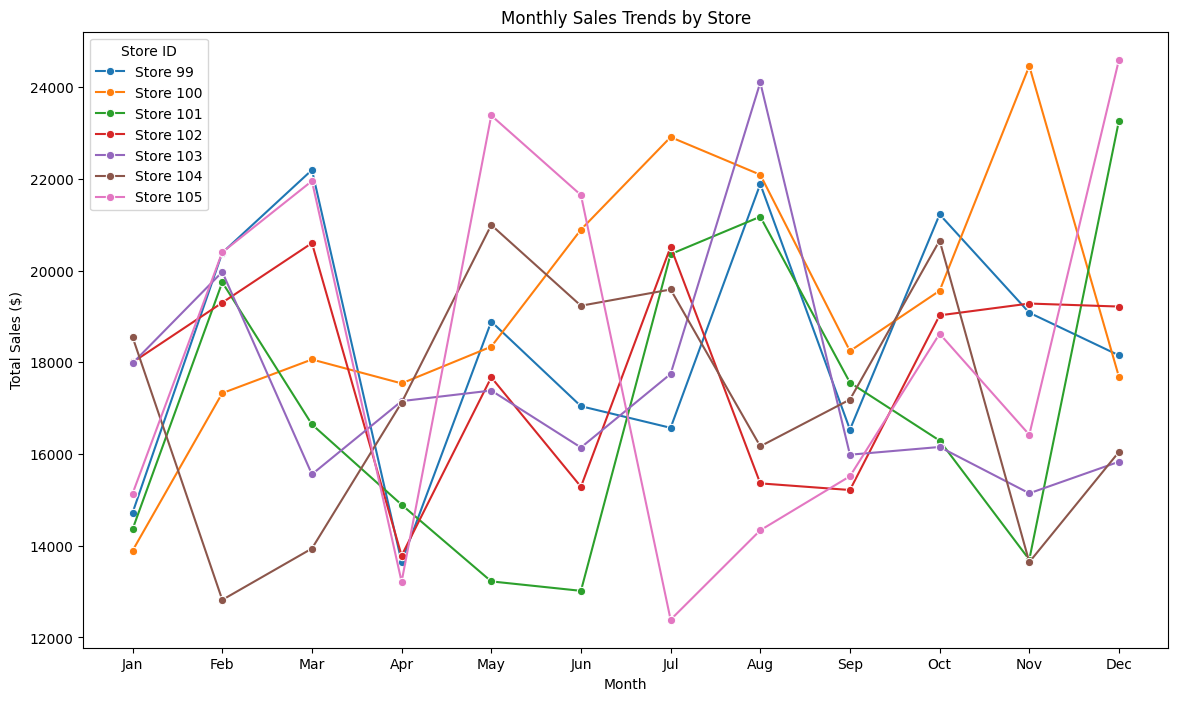

In [77]:
# Convert date to datetime and extract month in a single step
sales_df['month'] = pd.to_datetime(sales_df['date']).dt.month

# Group by store and month, calculate total revenue, and plot
sales_by_store_month = sales_df.groupby(['store_ids', 'month'], as_index=False)['total_amount'].sum()

# Plot sales trends for each store
plt.figure(figsize=(14, 8))
for store_id, store_data in sales_by_store_month.groupby('store_ids'):
    sns.lineplot(x='month', y='total_amount', data=store_data, marker="o", label=f'Store {store_id}')

# Add labels, title, and legend
plt.title('Monthly Sales Trends by Store')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Store ID')
plt.show()


### Monthly Sales Trends by Store
This graph shows the sales performance of six stores (Store 99, Store 100, Store 101, Store 102, Store 103, Store 104 and Store 105) throughout the year. Each line represents a store’s monthly sales in dollars.

Key Points:

- Seasonal Trends: Sales peak during certain months, indicating seasonal demand.
- Store Comparisons: Some stores consistently outperform others.
- Sales Consistency: Stability varies, with some stores showing more consistent sales than others.

This visualization helps identify patterns and opportunities to optimize sales strategies.
________________

### How do our product prices compare to competitor prices on average?

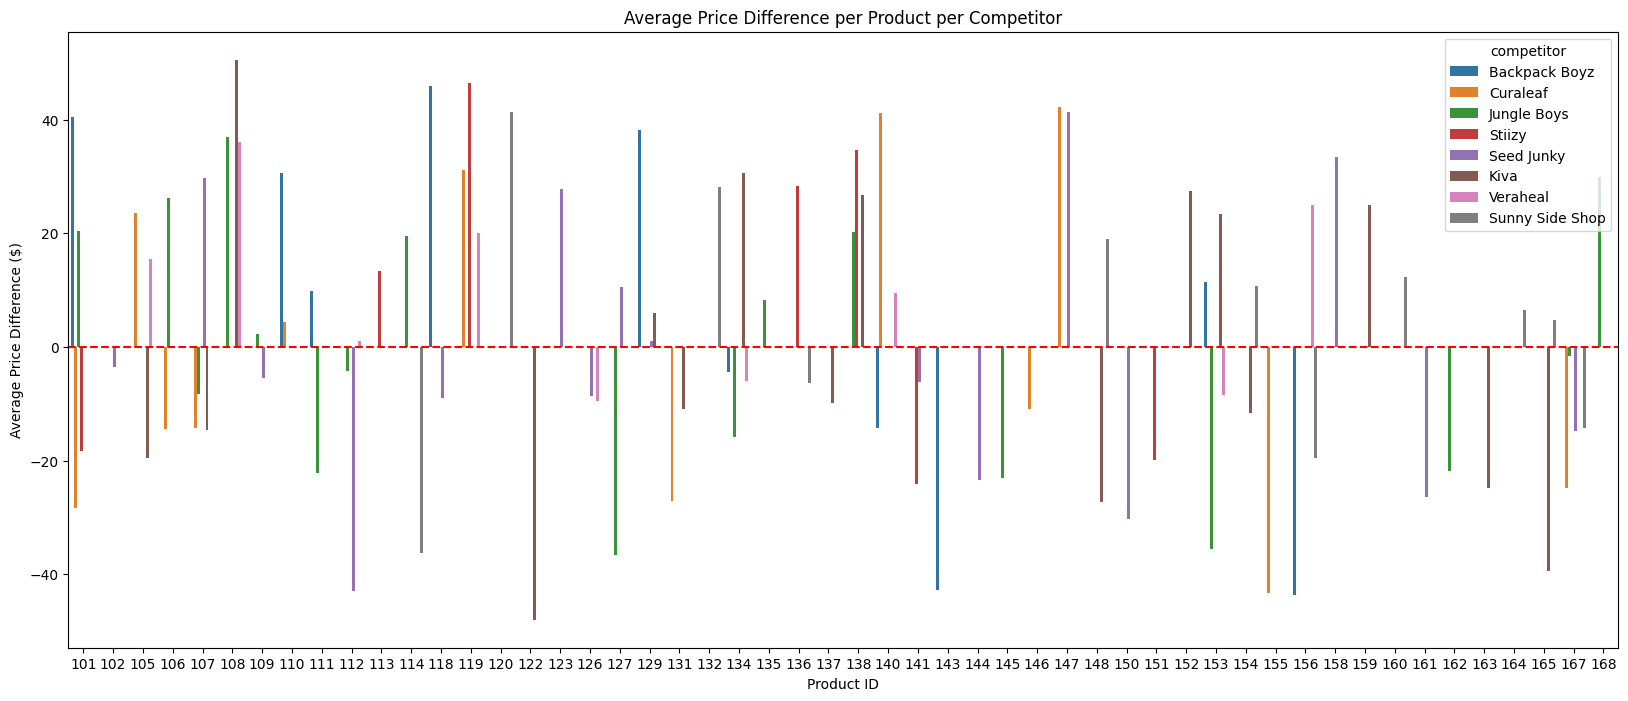

In [86]:
# Step 1: Merge sales data with competitor pricing data on product_id
pricing_comparison = pd.merge(
    sales_df[['product_id', 'price']], 
    competitor_pricing_df[['product_id', 'price', 'competitor']],
    on='product_id', suffixes=('_ours', '_competitor')
)

# Step 2: Calculate price difference for each product and competitor
pricing_comparison['price_difference'] = pricing_comparison['price_ours'] - pricing_comparison['price_competitor']

# Step 3: Calculate the average price difference per product per competitor
avg_price_diff = pricing_comparison.groupby(['product_id', 'competitor'])['price_difference'].mean().reset_index()

# Step 4: Visualize the average price difference per product per competitor
plt.figure(figsize=(20, 8))
sns.barplot(x='product_id', y='price_difference', hue='competitor', data=avg_price_diff)
plt.title('Average Price Difference per Product per Competitor')
plt.xlabel('Product ID')
plt.ylabel('Average Price Difference ($)')
plt.axhline(0, color='red', linestyle='--')
plt.show()


### Average Price Difference per Product per Competitor
This horizontal bar chart shows the average price difference in percentage for various competitors: Backpack Boyz, Curaleaf, Jungle Boys, Stiiizy, Seed Junky, Kiva, Veraheal, and Sunny Side Shop. Each bar represents whether the competitor’s average price is higher or lower compared to a reference.

Key Points:

- Price Comparison: Most competitors have positive average price differences, indicating higher prices compared to the reference.
- Visual Insight: The chart provides a clear comparison of pricing strategies among competitors, helping to identify any outliers or trends.

____